<a href="https://colab.research.google.com/github/302b46/Parallel-Programming-Project/blob/main/Parallel_Project-59res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# example of timing the training of a random forest model
from time import time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


>cores=1: 59.401 seconds
>cores=4: 40.812 seconds
>cores=-1: 41.867 seconds


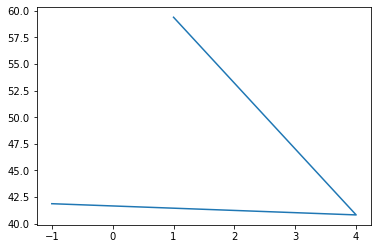

In [8]:
# define dataset
X, y = make_classification(n_samples=30000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
results = list()
# compare timing for number of cores
n_cores = [1, 4, -1] #if n_jobs=-1 it means that we use all available cores
for n in n_cores:
	# capture current time
	start = time()
	# define the model
	model = RandomForestClassifier(n_estimators=500, n_jobs=n) #random forest model with 500 trees
	# fit the model
	model.fit(X, y)
	# capture current time
	end = time()
	# store execution time
	result = end - start
	print('>cores=%d: %.3f seconds' % (n, result))
	results.append(result)
pyplot.plot(n_cores, results)
pyplot.show()

>cores=1: 91.398 seconds
>cores=4: 64.010 seconds
>cores=-1: 61.984 seconds


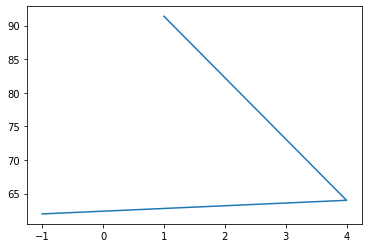

In [6]:
# compare execution speed for model evaluation vs number of cpu cores
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
results = list()
# compare timing for number of cores
n_cores = [1, 4, -1]
for n in n_cores:
	# define the model
	model = RandomForestClassifier(n_estimators=100, n_jobs=1)
	# define the evaluation procedure
  # cross-val is a resampling procedure used to evaluate machine learning models on a limited data sample
  # we will evaluate the model using 10-fold cross-val with three repeats
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# record the current time
	start = time()
	# evaluate the model
	n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=n)
	# record the current time
	end = time()
	# store execution time
	result = end - start
	print('>cores=%d: %.3f seconds' % (n, result))
	results.append(result)
pyplot.plot(n_cores, results)
pyplot.show()